In [215]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime as dt
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import dtale

In [216]:
supermarket=pd.read_csv('E:/Work/customer_supermarket.csv',on_bad_lines='skip',sep='\t',index_col=0)
data= supermarket[pd.notnull(supermarket['CustomerID'])]
#dtale.show(data)
#dtale.show(data).open_browser()

In [217]:
supermarket.describe()

,CustomerID,Qta
count,406830.000000,471910.000000
mean,15287.684160,10.716533
std,1713.603074,231.355136
min,12346.000000,-80995.000000
25%,13953.000000,1.000000
50%,15152.000000,4.000000
75%,16791.000000,12.000000
max,18287.000000,80995.000000


In [218]:
print(data)

       BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0        536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1        536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2        536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3        536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4        536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   
...         ...             ...   ...         ...             ...     ...   
541905   581587  09/12/11 12:50   2,1     12680.0          France   22899   
541906   581587  09/12/11 12:50  4,15     12680.0          France   23254   
541907   581587  09/12/11 12:50  4,15     12680.0          France   23255   
541908   581587  09/12/11 12:50  4,95     12680.0          France   22138   
541909   581587  09/12/11 12:50    18     12680.0          France    POST   

                                  ProdDescr  Qta  
0        WHITE HANGING H

In [219]:
print(supermarket['CustomerID'].value_counts())

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64


In [220]:
Expensive_Purchases = supermarket.groupby("CustomerCountry")[["Sale"]].max().sort_values("Sale", ascending=False)
print(Expensive_Purchases)

                       Sale
CustomerCountry            
United Kingdom        99,96
Australia              9,95
Poland                 9,95
Austria                9,95
Japan                  9,95
Lebanon                9,95
Malta                  9,95
Netherlands            9,95
Norway                 9,95
Portugal               9,95
Iceland                9,95
RSA                    9,95
Spain                  9,95
Sweden                 9,95
Switzerland            9,95
USA                    9,95
Israel                 9,95
Italy                  9,95
Hong Kong              9,95
EIRE                   9,95
Bahrain                9,95
Belgium                9,95
Canada                 9,95
Channel Islands        9,95
Cyprus                 9,95
Finland                9,95
France                 9,95
Germany                9,95
Unspecified            8,95
European Community      8,5
Greece                  8,5
Singapore               8,5
Brazil                 8,25
Denmark             

<Axes: xlabel='CustomerCountry'>

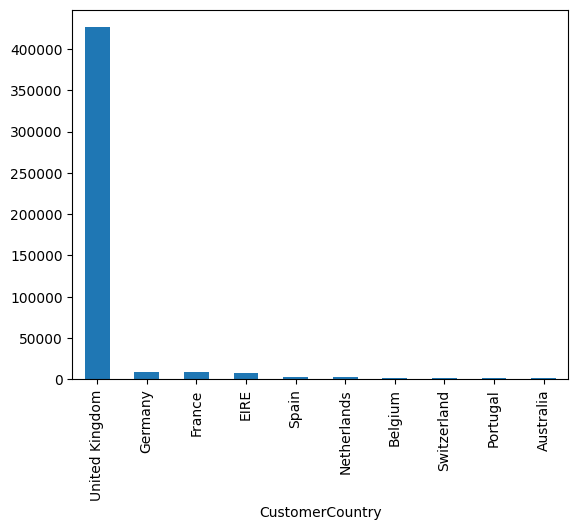

In [221]:
supermarket['CustomerCountry'].value_counts()[:10].plot(kind='bar')

In [222]:
print(supermarket.shape)


(471910, 8)


In [223]:
print(supermarket.dtypes)

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object


In [224]:
#Check Weather Any column having null or not
print(supermarket.isnull().any())

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool


In [225]:
#As BasketID is object type so We have to check existing Data
codes=supermarket[supermarket["BasketID"].str.contains('^[a-zA-Z]+',regex=True)]["BasketID"].unique()
print(pd.Series(codes).apply(lambda x:x[0]).unique())

print('Conains C in BasketID: {0}'.format(supermarket[supermarket["BasketID"].str.contains('C')].shape[0]))
print('Conains A in BasketID: {0}'.format(supermarket[supermarket["BasketID"].str.contains('A')].shape[0]))

cancelledOrder=supermarket[supermarket['BasketID'].str.contains('C')]
print(cancelledOrder)

Total_beforeDrop=supermarket.shape[0]
supermarket.drop_duplicates(ignore_index=True,inplace=True)
Total_AfterDrop=supermarket.shape[0]
remainTotal=Total_beforeDrop-Total_AfterDrop
CancelledRecords=remainTotal/Total_beforeDrop*100
print('Cancelled Records: {0} %'.format(CancelledRecords))

DebtedOrder=supermarket[supermarket['BasketID'].str.contains('A')]
print(DebtedOrder)

specialCodes=supermarket[supermarket["ProdID"].str.contains('^[a-zA-Z]+',regex=True)]["ProdID"].unique()
for code in specialCodes:
  print('{0} having Description: {1}'.format(code,supermarket[supermarket["ProdID"]==code]["ProdDescr"].unique()[0]))

['C' 'A']
Conains C in BasketID: 9084
Conains A in BasketID: 2
       BasketID      BasketDate    Sale  CustomerID CustomerCountry  ProdID  \
141     C536379  01/12/10 09:41    27,5     14527.0  United Kingdom       D   
154     C536383  01/12/10 09:49    4,65     15311.0  United Kingdom  35004C   
235     C536391  01/12/10 10:24    1,65     17548.0  United Kingdom   22556   
236     C536391  01/12/10 10:24    0,29     17548.0  United Kingdom   21984   
237     C536391  01/12/10 10:24    0,29     17548.0  United Kingdom   21983   
...         ...             ...     ...         ...             ...     ...   
540449  C581490  09/12/11 09:57    0,83     14397.0  United Kingdom   23144   
541541  C581499  09/12/11 10:28  224,69     15498.0  United Kingdom       M   
541715  C581568  09/12/11 11:57   10,95     15311.0  United Kingdom   21258   
541716  C581569  09/12/11 11:58    1,25     17315.0  United Kingdom   84978   
541717  C581569  09/12/11 11:58    1,25     17315.0  United Kingdom 

In [226]:
print(supermarket.head(10))

  BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2   536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   
5   536365  01/12/10 08:26  7,65     17850.0  United Kingdom   22752   
6   536365  01/12/10 08:26  4,25     17850.0  United Kingdom   21730   
7   536366  01/12/10 08:28  1,85     17850.0  United Kingdom   22633   
8   536366  01/12/10 08:28  1,85     17850.0  United Kingdom   22632   
9   536368  01/12/10 08:34  4,25     13047.0  United Kingdom   22960   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG H

In [227]:
print(supermarket.describe())

          CustomerID            Qta
count  401605.000000  466678.000000
mean    15281.154341      10.806528
std      1714.008869     232.627771
min     12346.000000  -80995.000000
25%     13939.000000       2.000000
50%     15145.000000       4.000000
75%     16784.000000      12.000000
max     18287.000000   80995.000000


In [228]:
supermarket.shape

(466678, 8)

In [229]:
print(supermarket.columns)

Index(['BasketID', 'BasketDate', 'Sale', 'CustomerID', 'CustomerCountry',
       'ProdID', 'ProdDescr', 'Qta'],
      dtype='object')


In [230]:
print(supermarket.isnull().sum())

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65073
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
dtype: int64


In [231]:
print(supermarket['BasketDate'].nunique())

22428


In [246]:
print(supermarket['BasketDate'].unique())

<DatetimeArray>
['2010-01-12 08:26:00', '2010-01-12 08:28:00', '2010-01-12 08:34:00',
 '2010-01-12 08:35:00', '2010-01-12 08:45:00', '2010-01-12 09:00:00',
 '2010-01-12 09:01:00', '2010-01-12 09:02:00', '2010-01-12 09:09:00',
 '2010-01-12 09:32:00',
 ...
 '2011-09-12 12:09:00', '2011-09-12 12:16:00', '2011-09-12 12:19:00',
 '2011-09-12 12:20:00', '2011-09-12 12:21:00', '2011-09-12 12:23:00',
 '2011-09-12 12:25:00', '2011-09-12 12:31:00', '2011-09-12 12:49:00',
 '2011-09-12 12:50:00']
Length: 17286, dtype: datetime64[ns]


In [232]:
data= supermarket[pd.notnull(supermarket['CustomerID'])]
data

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466673,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466674,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466675,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466676,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [233]:
nullCustomer=supermarket["CustomerID"].isnull().sum()
print(nullCustomer)
totalSample=supermarket.shape
totalSample

65073


(466678, 8)

In [234]:
#remove null values
supermarket = supermarket.dropna()
#supermarket=data[['CustomerCountry','CustomerID']].drop_duplicates()
#Check Null values after remove.
nullCustomer_afterDrop=supermarket.isnull().sum()
print(nullCustomer_afterDrop)

BasketID           0
BasketDate         0
Sale               0
CustomerID         0
CustomerCountry    0
ProdID             0
ProdDescr          0
Qta                0
dtype: int64


In [235]:
#supermarket["CustomerID"]=supermarket["CustomerID"].astype('number')
supermarket['BasketDate'] = pd.to_datetime(supermarket['BasketDate'])
supermarket['Sale'] = supermarket['Sale'].str.replace(',','.')
supermarket['Sale'] =pd.to_numeric(supermarket['Sale'])
supermarket['Max_Year_Date'] = supermarket['BasketDate'].max() 
supermarket['Year'] = supermarket['BasketDate'].dt.year

C:\Users\hp\AppData\Local\Temp\ipykernel_23556\1708384587.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [236]:
supermarket["CustomerID"]=supermarket["CustomerID"].astype('object')


In [237]:
print(supermarket.dtypes)

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
Max_Year_Date      datetime64[ns]
Year                        int32
dtype: object


In [238]:
print(supermarket.info())


<class 'pandas.core.frame.DataFrame'>
Index: 401605 entries, 0 to 466677
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         401605 non-null  object        
 1   BasketDate       401605 non-null  datetime64[ns]
 2   Sale             401605 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  401605 non-null  object        
 5   ProdID           401605 non-null  object        
 6   ProdDescr        401605 non-null  object        
 7   Qta              401605 non-null  int64         
 8   Max_Year_Date    401605 non-null  datetime64[ns]
 9   Year             401605 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(5)
memory usage: 32.2+ MB
None


In [239]:
print(supermarket.describe())

                          BasketDate           Sale            Qta  \
count                         401605  401605.000000  401605.000000   
mean   2011-06-21 05:30:08.614434816       3.474100      12.183245   
min              2010-01-12 08:26:00       0.000000  -80995.000000   
25%              2011-03-30 11:39:00       1.250000       2.000000   
50%              2011-07-08 13:08:00       1.950000       5.000000   
75%              2011-10-08 16:39:00       3.750000      12.000000   
max              2011-12-10 17:19:00   38970.000000   80995.000000   
std                              NaN      69.763952     250.282726   

                       Max_Year_Date           Year  
count                         401605  401605.000000  
mean   2011-12-10 17:18:59.999998720    2010.934378  
min              2011-12-10 17:19:00    2010.000000  
25%              2011-12-10 17:19:00    2011.000000  
50%              2011-12-10 17:19:00    2011.000000  
75%              2011-12-10 17:19:00    2011.

In [240]:
#As Quantity is negative after check supermarket.describe()
supermarket =supermarket[(supermarket['Qta']>0)]

In [241]:
supermarket

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Max_Year_Date,Year
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-10 17:19:00,2010
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,2011-12-10 17:19:00,2010
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2011-12-10 17:19:00,2010
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2011-12-10 17:19:00,2010
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2011-12-10 17:19:00,2010
...,...,...,...,...,...,...,...,...,...,...
466673,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-10 17:19:00,2011
466674,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-10 17:19:00,2011
466675,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-10 17:19:00,2011
466676,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-10 17:19:00,2011


In [242]:
supermarket.describe()

,BasketDate,Sale,Qta,Max_Year_Date,Year
count,392733,392733.000000,392733.000000,392733,392733.000000
mean,2011-06-21 08:33:11.419361280,3.125633,13.153687,2011-12-10 17:18:59.999998720,2010.934630
min,2010-01-12 08:26:00,0.000000,1.000000,2011-12-10 17:19:00,2010.000000
25%,2011-03-30 11:48:00,1.250000,2.000000,2011-12-10 17:19:00,2011.000000
50%,2011-07-09 08:18:00,1.950000,6.000000,2011-12-10 17:19:00,2011.000000
75%,2011-10-10 10:51:00,3.750000,12.000000,2011-12-10 17:19:00,2011.000000
max,2011-12-10 17:19:00,8142.750000,80995.000000,2011-12-10 17:19:00,2011.000000
std,NaN,22.240710,181.588189,NaN,0.247178


In [243]:
supermarket

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Max_Year_Date,Year
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-10 17:19:00,2010
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,2011-12-10 17:19:00,2010
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2011-12-10 17:19:00,2010
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2011-12-10 17:19:00,2010
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2011-12-10 17:19:00,2010
...,...,...,...,...,...,...,...,...,...,...
466673,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-10 17:19:00,2011
466674,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-10 17:19:00,2011
466675,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-10 17:19:00,2011
466676,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-10 17:19:00,2011


In [249]:
supermarket.reset_index(inplace=True)
supermarket['Date_Interval'] = supermarket['Max_Year_Date'] - supermarket['BasketDate']

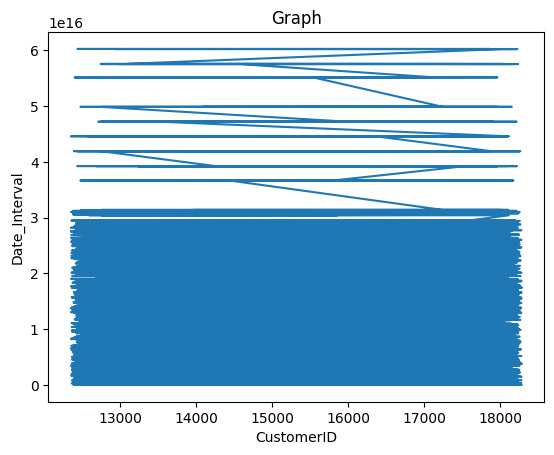

In [250]:
# plotting the points  
plt.plot(supermarket.CustomerID, supermarket.Date_Interval) 
# naming the x axis 
plt.xlabel('CustomerID') 
# naming the y axis 
plt.ylabel('Date_Interval') 
  
# giving a title to my graph 
plt.title('Graph') 
plt.show() 

In [248]:
supermarket['Date_Interval'] = supermarket['Max_Year_Date'] - supermarket['BasketDate']

In [ ]:
supermarket

In [251]:
rfm_gb = supermarket.groupby(['Year', 'CustomerID'], as_index = False).agg({'Date_Interval': 'min', 'BasketDate': 'count', 'Sale': 'mean'})
rfm_gb.columns = ['Year', 'CustomerID', 'R', 'F', 'M']

In [252]:
rfm_gb

,Year,CustomerID,R,F,M
0,2010,12347.0,516 days 02:22:00,31,2.890000
1,2010,12348.0,358 days 22:10:00,17,2.917647
2,2010,12370.0,358 days 07:41:00,90,2.884778
3,2010,12377.0,355 days 07:42:00,43,2.106279
4,2010,12383.0,353 days 02:51:00,37,1.325135
...,...,...,...,...,...
5100,2011,18280.0,160 days 07:27:00,10,4.765000
5101,2011,18281.0,4 days 06:26:00,7,5.622857
5102,2011,18282.0,216 days 03:44:00,12,5.199167
5103,2011,18283.0,10 days 04:20:00,721,1.628752


C:\Users\hp\AppData\Local\Temp\ipykernel_23556\2257441795.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hp\AppData\Local\Temp\ipykernel_23556\2257441795.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hp\AppData\Local\Temp\ipykernel_23556\2257441795.py:7: UserWarning:



`distplot` is a deprec

,Year,R,F,M
count,5105.000000,5105,5105.000000,5105.000000
mean,2010.826641,157 days 12:24:33.590597454,76.931048,4.481913
std,0.378595,168 days 13:33:42.494122762,198.572649,32.768593
min,2010.000000,0 days 00:00:00,1.000000,0.000000
25%,2011.000000,25 days 03:58:00,15.000000,2.208969
50%,2011.000000,82 days 05:30:00,34.000000,2.917432
75%,2011.000000,254 days 05:22:00,82.000000,3.837333
max,2011.000000,697 days 08:44:00,7390.000000,2033.100000


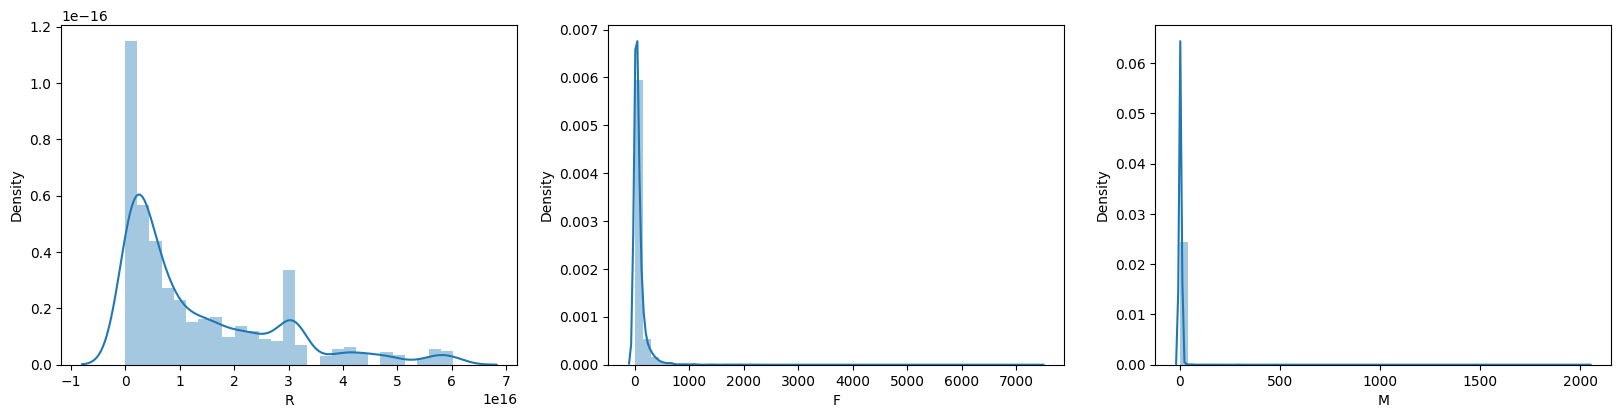

In [253]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(rfm_gb['R'])
plt.subplot(3, 3, 2)
sns.distplot(rfm_gb['F'])
plt.subplot(3, 3, 3)
sns.distplot(rfm_gb['M'])

rfm_gb.describe()


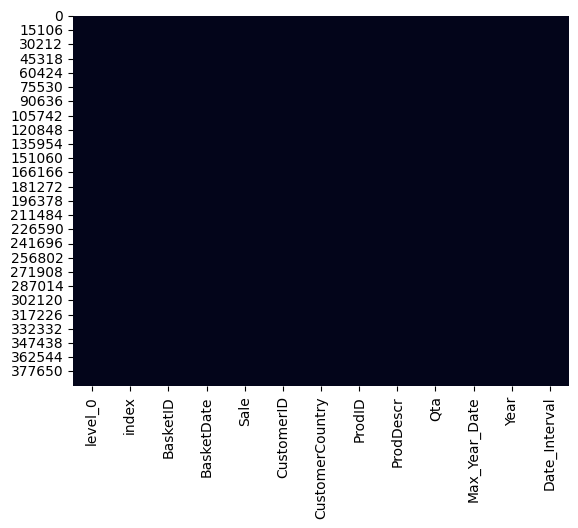

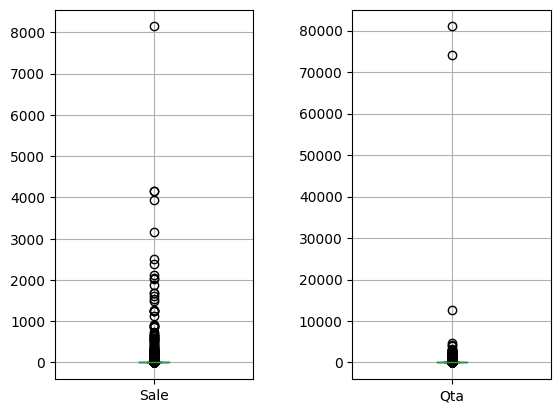

In [254]:
sns.heatmap(supermarket.isnull(),cbar=False)

fig,(ax1,ax2)=plt.subplots(1,2)
supermarket.boxplot(column=['Sale'],ax=ax1)
supermarket.boxplot(column=['Qta'],ax=ax2)
fig.subplots_adjust(wspace=0.5)
plt.savefig('/boxplots_before.png')
plt.show()

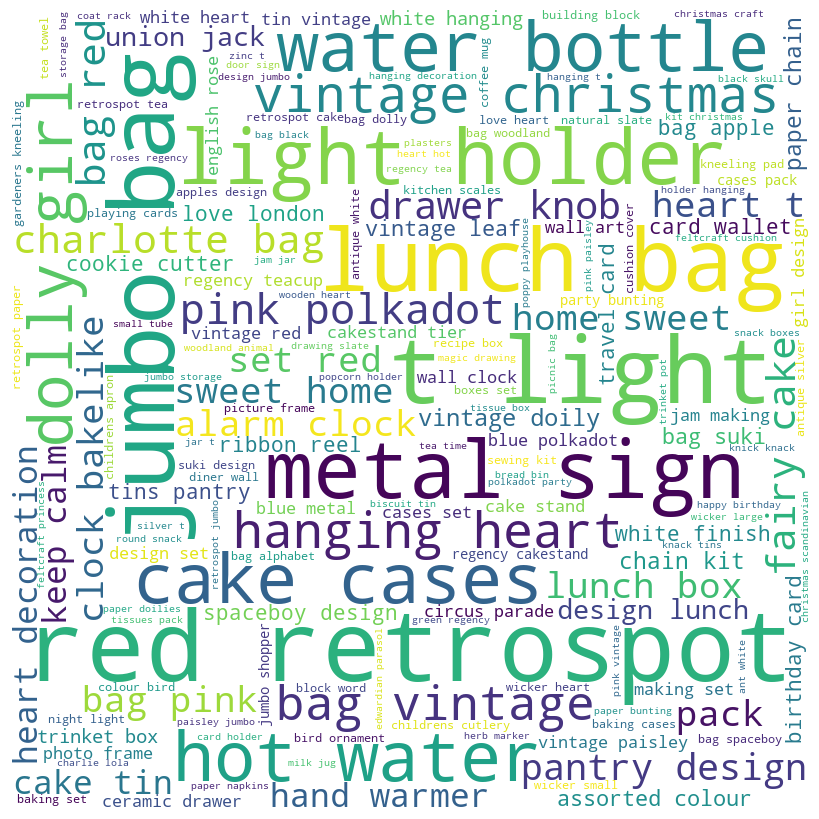

In [255]:
comment_words = ''
# iterate through the csv file
for val in supermarket['ProdDescr']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [256]:
print(supermarket.groupby(['CustomerID'])['Qta'].max())

CustomerID
12346.0    74215
12347.0      240
12348.0      144
12349.0       36
12350.0       24
           ...  
18280.0        8
18281.0       12
18282.0       48
18283.0       13
18287.0       60
Name: Qta, Length: 4339, dtype: int64


In [257]:
supermarket.head(2)

,level_0,index,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Max_Year_Date,Year,Date_Interval
0,0,0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-10 17:19:00,2010,697 days 08:53:00
1,1,1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,2011-12-10 17:19:00,2010,697 days 08:53:00


In [258]:
grp=supermarket.groupby(supermarket['BasketDate'].dt.to_period('Q'))['ProdID']
for item in grp:
    print(item)

(Period('2010Q1', 'Q-DEC'), 0       85123A
1        71053
2       84406B
3       84029G
4       84029E
         ...  
4938     84879
4939     22943
4940     22837
4941    35004C
4942    85135C
Name: ProdID, Length: 4943, dtype: object)
(Period('2010Q2', 'Q-DEC'), 4943     22114
4944     21485
4945     22835
4946    84029E
4947    84029G
         ...  
9438     21876
9439     21874
9440     22766
9441     22693
9442     22423
Name: ProdID, Length: 4500, dtype: object)
(Period('2010Q3', 'Q-DEC'), 9443     20782
9444     21135
9445     21175
9446     21397
9447     21411
         ...  
14180    22271
14181    22750
14182    22751
14183    20970
14184    21931
Name: ProdID, Length: 4742, dtype: object)
(Period('2010Q4', 'Q-DEC'), 14185     21562
14186     79321
14187     22041
14188    84558A
14189     22952
          ...  
25668     84380
25669    84849D
25670    84849B
25671     22854
25672    47559B
Name: ProdID, Length: 11488, dtype: object)
(Period('2011Q1', 'Q-DEC'), 33381     22423
